In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scienceplots
%matplotlib inline

from nanonets.utils import prepare_for_fitness_calculation, fitness, abundance, abundance_plot, get_best_logic_gate, nonlinear_parameter, return_ndr, return_nls

PATH    = "/home/jonasmensing/bagheera/data/2_funding_period/static/res_disorder/"
PATH_U  = "/home/jonasmensing/bagheera/data/1_funding_period/system_size_scaled/"
V_IN    = 0.01
DELTA   = 0.0
MAX_ERROR = 0.1
GATES   = ['AND', 'OR', 'XOR', 'NAND', 'NOR', 'XNOR']
plt.style.use(["science","bright","grid"])

In [13]:
data_50  = {}
data_100 = {}
data_200 = {}
df_u    = pd.read_csv(f"{PATH_U}Nx=9_Ny=9_Ne=8.csv")
df_u    = df_u[(df_u['Error']/df_u['Observable']).abs() < MAX_ERROR].reset_index(drop=True)
df_u    = prepare_for_fitness_calculation(df_u, N_e=8, input_cols=["E1","E3"])
df_dis_50  = pd.DataFrame()
for i in range(64):
    df      = pd.read_csv(f"{PATH}Nx=9_Ny=9_Ne=8_mean2_50.0_{i}.csv")
    df      = df[(df['Error']/df['Observable']).abs() < MAX_ERROR].reset_index(drop=True)
    df      = prepare_for_fitness_calculation(df, N_e=8, input_cols=["E1","E3"])
    df_dis_50  = pd.concat((df_dis_50,df),ignore_index=True)
    data_50[i] = df

df_dis_100  = pd.DataFrame()
for i in range(64):
    df      = pd.read_csv(f"{PATH}Nx=9_Ny=9_Ne=8_mean2_100.0_{i}.csv")
    df      = df[(df['Error']/df['Observable']).abs() < MAX_ERROR].reset_index(drop=True)
    df      = prepare_for_fitness_calculation(df, N_e=8, input_cols=["E1","E3"])
    df_dis_100  = pd.concat((df_dis_100,df),ignore_index=True)
    data_100[i] = df

df_dis_200  = pd.DataFrame()
for i in range(64):
    df      = pd.read_csv(f"{PATH}Nx=9_Ny=9_Ne=8_mean2_200.0_{i}.csv")
    df      = df[(df['Error']/df['Observable']).abs() < MAX_ERROR].reset_index(drop=True)
    df      = prepare_for_fitness_calculation(df, N_e=8, input_cols=["E1","E3"])
    df_dis_200  = pd.concat((df_dis_200,df),ignore_index=True)
    data_200[i] = df

In [14]:
fitness_data_u      = fitness(df_u, input_cols=["E1","E3"], on_state=0.01, delta=DELTA)
abundance_data_u    = abundance(fitness_data_u)
fitness_data_dis_50    = fitness(df_dis_50, input_cols=["E1","E3"], on_state=0.01, delta=DELTA)
abundance_data_dis_50  = abundance(fitness_data_dis_50)
fitness_data_dis_100    = fitness(df_dis_100, input_cols=["E1","E3"], on_state=0.01, delta=DELTA)
abundance_data_dis_100  = abundance(fitness_data_dis_100)
fitness_data_dis_200    = fitness(df_dis_200, input_cols=["E1","E3"], on_state=0.01, delta=DELTA)
abundance_data_dis_200  = abundance(fitness_data_dis_200)
# fitness_data        = {key : fitness(df, input_cols=["E1","E3"], on_state=0.01, delta=DELTA) for key, df in data_50.items()}
# abundance_data      = {key : abundance(df) for key, df in fitness_data.items()}

In [16]:
df1 = fitness_data_u.loc[:,'AND Fitness':]
df1.columns = GATES
df1 = df1.melt(var_name='Gate', value_name='$Fitness$')
df1['Disorder'] = 25

df2 = fitness_data_dis_50.loc[:,'AND Fitness':]
df2.columns = GATES
df2 = df2.melt(var_name='Gate', value_name='$Fitness$')
df2['Disorder'] = 50

df3 = fitness_data_dis_100.loc[:,'AND Fitness':]
df3.columns = GATES
df3 = df3.melt(var_name='Gate', value_name='$Fitness$')
df3['Disorder'] = 100

df4 = fitness_data_dis_200.loc[:,'AND Fitness':]
df4.columns = GATES
df4 = df4.melt(var_name='Gate', value_name='$Fitness$')
df4['Disorder'] = 200

fitness_melted = pd.concat([df1,df2,df3,df4],ignore_index=True)
fitness_melted

,Gate,$Fitness$,Disorder
0,AND,1.425654,25
1,AND,4.314244,25
2,AND,2.564782,25
3,AND,4.344509,25
4,AND,2.393122,25
...,...,...,...
6012487,XNOR,0.340988,200
6012488,XNOR,0.418286,200
6012489,XNOR,-0.532661,200
6012490,XNOR,0.784931,200


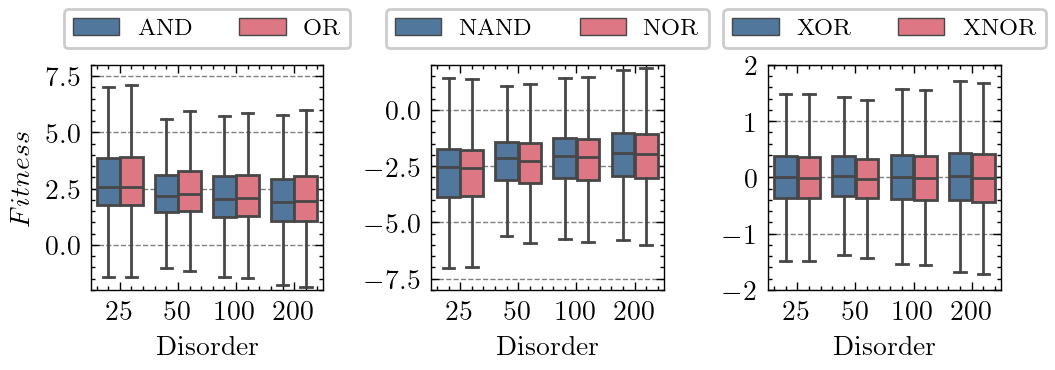

In [17]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.5)
fig.set_figheight(fig.get_figheight()*0.7)

for i, g_comb in enumerate([['AND','OR'],['NAND','NOR'],['XOR','XNOR']]):

    ax  = fig.add_subplot(1,3,i+1)
    ax  = sns.boxplot(data=fitness_melted[(fitness_melted['Gate']==g_comb[0])|(fitness_melted['Gate']==g_comb[1])],
                      x='Disorder', y='$Fitness$', hue='Gate', ax=ax, fliersize=0)
    leg = ax.legend(loc='center', bbox_to_anchor=(0.5,1.16), ncol=2, fontsize='small')
    leg.set_in_layout(True)
    if i != 0:
        ax.set_ylabel("")
    if i == 0:
        ax.set_ylim(-2,8)
    elif i == 1:
        ax.set_ylim(-8,2)
    else:
        ax.set_ylim(-2,2)

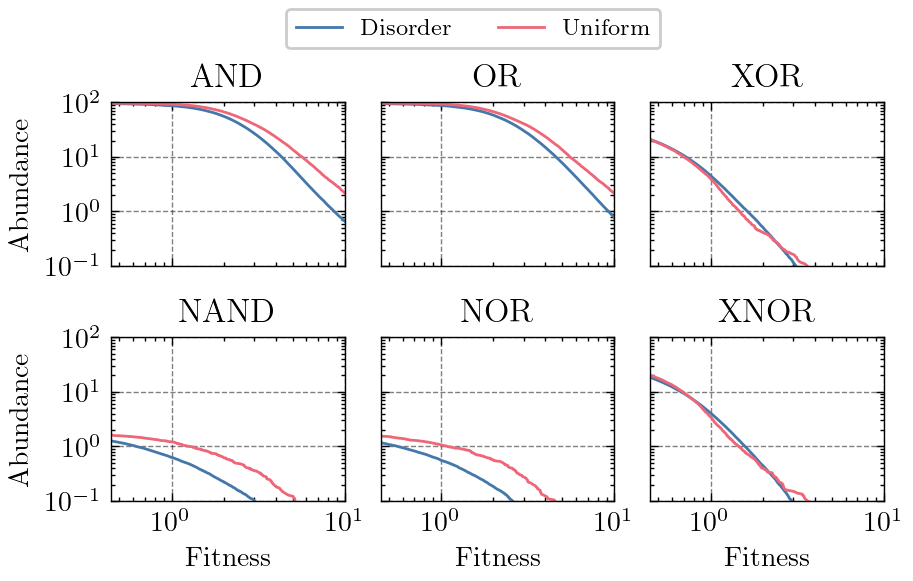

In [9]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.3)

for i, gate in enumerate(GATES):
    
    ax     = fig.add_subplot(2,3,i+1)
    x1, y1 = abundance_data_dis[f'{gate} Fitness'], abundance_data_dis[f'{gate} Fitness Abundance']
    x4, y4 = abundance_data_u[f'{gate} Fitness'], abundance_data_u[f'{gate} Fitness Abundance']

    ax.plot(x1,y1, label='Disorder')
    ax.plot(x4,y4, label='Uniform')

    ax.set_xlim(0.45,10)
    ax.set_ylim(0.1,100)
    ax.set_yscale('log')
    ax.set_xscale('log')

    if i % 3 == 0:
        ax.set_ylabel("Abundance")
    else:
        ax.set_yticklabels("")
    if i >= 3:
        ax.set_xlabel("Fitness")
    else:
        ax.set_xticklabels("")
    ax.set_title(gate)

    if i==0:
        leg = ax.legend(loc='center', bbox_to_anchor=(1.55,1.45), ncol=6, fontsize='small')

leg.set_in_layout(False)
fig.canvas.draw()
leg.set_in_layout(True)
fig.set_layout_engine('none')

In [25]:
# Current Relations
n_bootstrap = 100
params      = [nonlinear_parameter(df, on_state=0.01, n_bootstrap=n_bootstrap) for df in [df_u, df_dis_50, df_dis_100, df_dis_200]]

# NDR / NLS
bins    = 'fd'
Q_ndr   = []
Q_nls   = []
for i in range(n_bootstrap): 

    Q_ndr_l =   np.array([return_ndr(params[n][i]['Ml']) for n in range(4)])
    Q_ndr_r =   np.array([return_ndr(params[n][i]['Mr']) for n in range(4)])
    Q_ndr.append((Q_ndr_l + Q_ndr_r) / 2)

    Q_nls.append(np.array([return_nls(df=params[n][i], bins=bins) for n in range(4)]))

In [26]:
Q_nls

[array([0.05015169, 0.10770521, 0.12164193, 0.12949417]),
 array([0.05007601, 0.10754092, 0.1208913 , 0.13048038]),
 array([0.04909801, 0.10832438, 0.12124253, 0.1291589 ]),
 array([0.04815381, 0.10814413, 0.122245  , 0.13000685]),
 array([0.04970365, 0.10887648, 0.1210002 , 0.13016938]),
 array([0.04946993, 0.10767282, 0.12083345, 0.13083441]),
 array([0.04830066, 0.10826405, 0.12099861, 0.12961704]),
 array([0.04789385, 0.10825658, 0.1209471 , 0.12946704]),
 array([0.04933197, 0.10808657, 0.12156534, 0.13028191]),
 array([0.04935832, 0.10809545, 0.12089617, 0.12900906]),
 array([0.04771182, 0.10824935, 0.12132696, 0.13083904]),
 array([0.04948981, 0.10848707, 0.12206741, 0.12914012]),
 array([0.047819  , 0.10824977, 0.12210192, 0.13049226]),
 array([0.04878779, 0.10816584, 0.12113504, 0.12962604]),
 array([0.04953975, 0.10742369, 0.12206323, 0.1295418 ]),
 array([0.04895077, 0.10755201, 0.12150025, 0.12888414]),
 array([0.0474975 , 0.10784926, 0.1210641 , 0.12943733]),
 array([0.0480

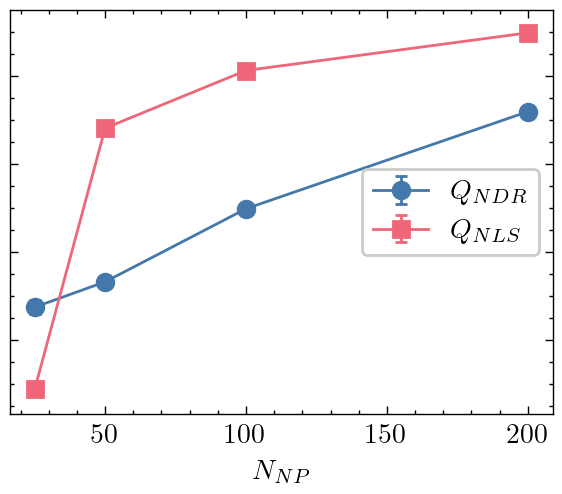

In [33]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    
    ax.errorbar([25,50,100,200], np.mean(Q_ndr,axis=0), 1.96*np.std(Q_ndr,axis=0), marker='o', label='$Q_{NDR}$', capsize=2)
    ax.errorbar([25,50,100,200], np.mean(Q_nls,axis=0), 1.96*np.std(Q_nls,axis=0), marker='s', label='$Q_{NLS}$', capsize=2)

    ax.set_xlabel('$N_{NP}$')
    ax.legend(loc='center right')
    # ax.set_ylim(0.1,0.5)
    ax.set_yticklabels("")
    ax.grid(False)

fig.savefig("plots/res_disorder/nonlinear_params.svg", transparent=True)
# fig.savefig("../plots/scaled_nonlinearity_vs_system_size_scaled.pdf", transparent=False, bbox_inches='tight')

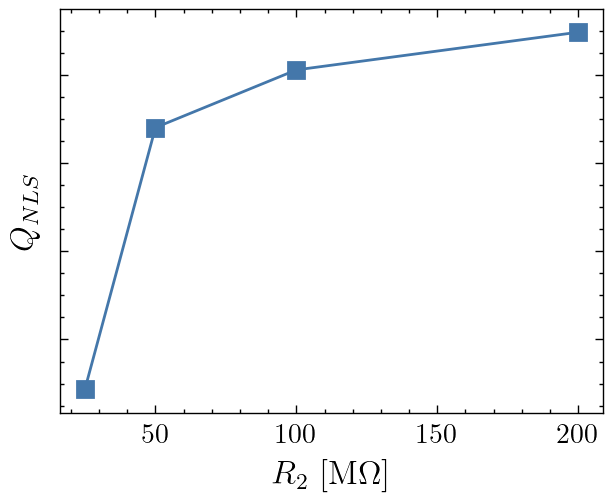

In [40]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    
    ax.errorbar([25,50,100,200], np.mean(Q_nls,axis=0), 1.96*np.std(Q_nls,axis=0), marker='s', label='$Q_{NLS}$', capsize=2)

    ax.set_xlabel('$R_2$ [M$\Omega$]', fontsize='large')
    # ax.legend(loc='center right')
    # ax.set_ylim(0.1,0.5)
    ax.set_yticklabels("")
    ax.grid(False)
    ax.set_ylabel("$Q_{NLS}$", fontsize='large')

fig.savefig("plots/res_disorder/nonlinear_params_nls.svg", transparent=True)
# fig.savefig("../plots/scaled_nonlinearity_vs_system_size_scaled.pdf", transparent=False, bbox_inches='tight')

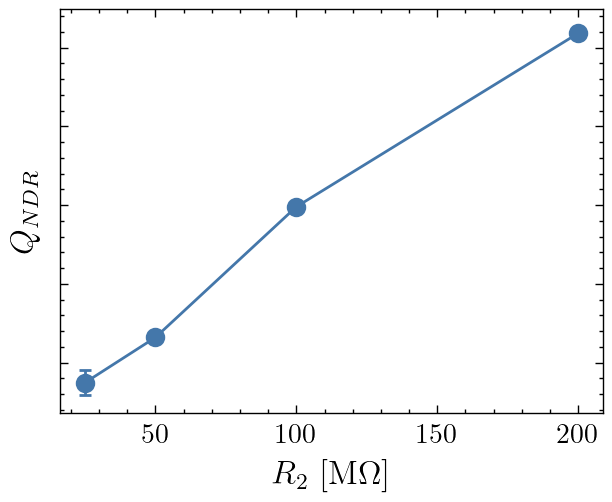

In [41]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    
    ax.errorbar([25,50,100,200], np.mean(Q_ndr,axis=0), 1.96*np.std(Q_ndr,axis=0), marker='o', label='$Q_{NDR}$', capsize=2)

    ax.set_xlabel('$R_2$ [M$\Omega$]', fontsize='large')
    # ax.legend(loc='center right')
    ax.set_ylabel("$Q_{NDR}$", fontsize='large')
    # ax.set_ylim(0.1,0.5)
    ax.set_yticklabels("")
    ax.grid(False)

fig.savefig("plots/res_disorder/nonlinear_params_ndr.svg", transparent=True)
# fig.savefig("../plots/scaled_nonlinearity_vs_system_size_scaled.pdf", transparent=False, bbox_inches='tight')

In [12]:
df_comp = pd.DataFrame()
for i in range(64):
    df1 = fitness_data[i].loc[:,'AND Fitness':]
    df1.columns = GATES
    df1 = df1.melt(var_name='Gate', value_name='$Fitness$')
    df1['Disorder'] = i
    df_comp = pd.concat((df_comp,df1),ignore_index=True)

df1 = fitness_data_u.loc[:,'AND Fitness':]
df1.columns = GATES
df1 = df1.melt(var_name='Gate', value_name='$Fitness$')
df1['Disorder'] = -1

df_comp = pd.concat([df_comp, df1], ignore_index=True)
df_comp

,Gate,$Fitness$,Disorder
0,AND,9.398278,0
1,AND,1.351152,0
2,AND,6.300581,0
3,AND,1.803353,0
4,AND,17.134290,0
...,...,...,...
417493,XNOR,0.002194,-1
417494,XNOR,-0.009091,-1
417495,XNOR,0.082449,-1
417496,XNOR,0.282562,-1


Text(0.5, 0, '$\\sigma_F$')

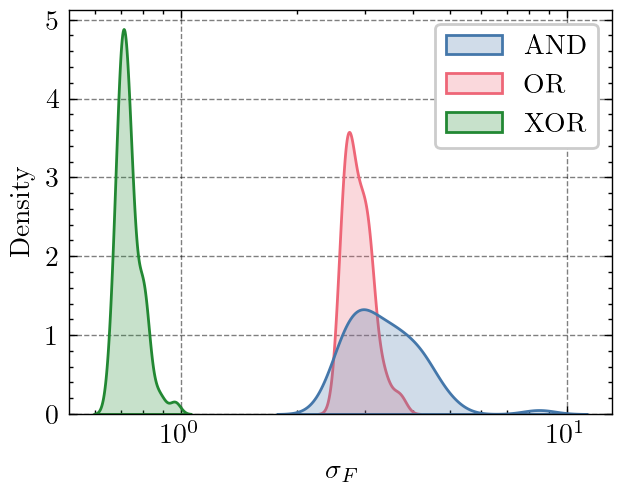

In [13]:
df = pd.DataFrame([[fitness_data[i][f'{gate} Fitness'].std() for i in range(64)] for gate in ['AND','OR','XOR']]).T
df.columns = ['AND','OR','XOR']
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax  = sns.kdeplot(df, ax=ax, log_scale=True, fill=True)
ax.set_xlabel("$\sigma_F$")

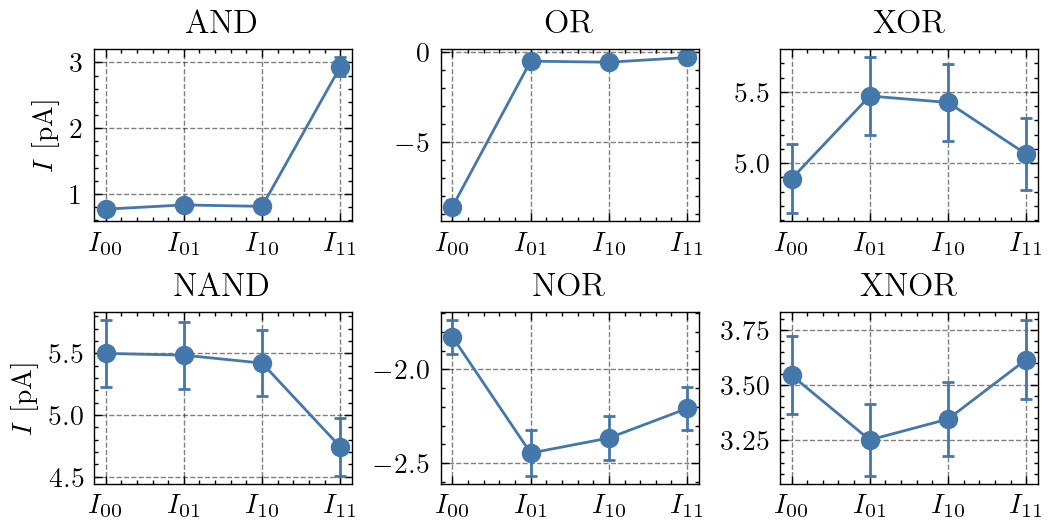

In [15]:
n   = 12
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.5)
for i, gate in enumerate(GATES):
    ax = fig.add_subplot(2,3,i+1)
    best_gate = get_best_logic_gate(data[n], fitness_data[n], gate)
    ax.errorbar([0,1,2,3], best_gate['Observable'].values*1e-6, best_gate['Error'].values*1e-6, marker='o', capsize=2)
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(["$I_{00}$","$I_{01}$","$I_{10}$","$I_{11}$"])
    ax.set_title(gate)
    if i % 3 == 0:
        ax.set_ylabel("$I$ [pA]")